In [2]:
%matplotlib inline
from fastai.basics import *

This notebook post contains some of my notes I took while studying gradient descent. This notebook was derived from the lesson2-sgd.ipynb notebook from fastai course-v3.

# Linear Regression Problem

In [3]:
n = 100

In [4]:
x = torch.ones(n,2)       #Create a 100x2 array with each element 1
x[:,0].uniform_(-1.,1)    #Replace column 2 of x with random numbers between -1 and 1 forming a uniform distribution
x[:5]                     #Display the first five rows of x

tensor([[ 0.6049,  1.0000],
        [ 0.4400,  1.0000],
        [-0.0314,  1.0000],
        [-0.7857,  1.0000],
        [ 0.1756,  1.0000]])

* A dot after -1 means that the numbers can be fractional (floating point) and don't have to be integers (in this case it doesn't matter though, read the docs here: https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.uniform.html)
* `:5` means all elements upto the index 5 (not including the index 5 element)
* `2:` would mean all elements after index 2 (including the index 2 element)


In [5]:
a = tensor(3., 2); a

tensor([3., 2.])

* From PyTorch docs: A ```torch.Tensor``` is a multi-dimensional matrix containing elements of a single data type.

In [6]:
y = x@a + torch.rand(n)

* torch.rand() takes the shape (dimensions) as input and returns uniformly distributed numbers between 0 and 1. In this case we wanted ```n = 100``` elements to offset the value of ```x@a```.

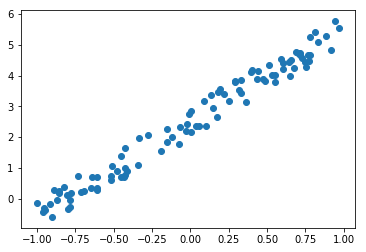

In [7]:
plt.scatter(x[:,0], y);

In [8]:
def mse(y, y_hat): return ((y-y_hat)**2).mean()   #Define the error function

Now that we have created mock data for our linear regression problem, we can proceed to finding the weights for the line which fits this data. Let us assume the weights to be (1, 1) initially.

In [10]:
a = tensor(1.,1)

In [15]:
y_hat = x@a
mse(y, y_hat)    #Compute the mean squared error between y and y_hat

tensor(3.8033)

Our goal is to minimise this error. We wish to find the values of ```a``` for which ```mse(y, y_hat)``` is minimum.

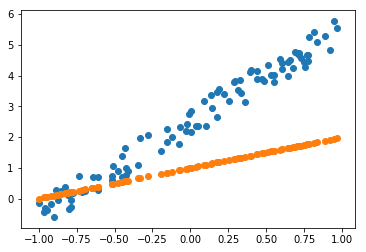

In [14]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

# Gradient Descent

In [18]:
a = nn.Parameter(a); a

Parameter containing:
tensor([1., 1.], requires_grad=True)

```a``` *was* a Tensor. Now ```a``` *is* a Parameter.
#### The difference between Tensors and Parameters (from PyTorch docs):
Parameters are Tensor subclasses, that have a very special property when used with Modules - when they’re assigned as Module attributes they are automatically added to the list of its parameters, and will appear e.g. in parameters() iterator. Assigning a Tensor doesn’t have such effect. This is because one might want to cache some temporary state, like last hidden state of the RNN, in the model. If there was no such class as Parameter, these temporaries would get registered too.

Now that ```a``` is a Parameter, it has a flag called ```requires_grad``` of which we can take advantage to compute gradients using autograd.

Read [this answer](https://stackoverflow.com/a/51383465) for a little more insight on the difference between Tensors and Parameters.

Also check out my last post for some info on ```requires_grad``` and autograd.

In [20]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr*a.grad)
        a.grad.zero_()

* `loss.backward()` computes `dloss/dx` for every parameter `x` which has `requires_grad=True`. These are accumulated into `x.grad` for every parameter `x`.
* We are basically saying that doing `a = a - lr*(dloss/da)` will get us closer to the value of `a` for which `loss` is minimum (Try to visualise how this works - subtracting a multiple of the slope of the curve drawn on the `a vs loss` plane from `a`)
* After performing the above step, we zero the gradient stored in `a`. This is because each subsequent call to `loss.backward()` accumulates the value in `a.grad` instead of replacing it.

In [22]:
lr = 1e-1
for t in range(100): update()

tensor(3.8033, grad_fn=<MeanBackward0>)
tensor(0.4544, grad_fn=<MeanBackward0>)
tensor(0.1692, grad_fn=<MeanBackward0>)
tensor(0.1089, grad_fn=<MeanBackward0>)
tensor(0.0950, grad_fn=<MeanBackward0>)
tensor(0.0918, grad_fn=<MeanBackward0>)
tensor(0.0911, grad_fn=<MeanBackward0>)
tensor(0.0909, grad_fn=<MeanBackward0>)
tensor(0.0908, grad_fn=<MeanBackward0>)
tensor(0.0908, grad_fn=<MeanBackward0>)


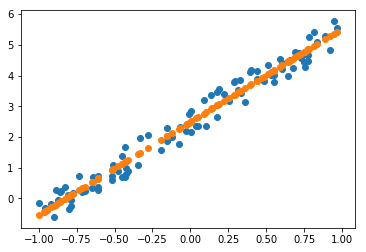

In [26]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], x@a);

# Animation

In [27]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [31]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)  #assign first element of returned tuple to line (same as line = plt.plot(...)[0])
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,  #return a tuple of one element

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

Read more about `line,`:
* https://stackoverflow.com/questions/16037494/x-is-this-trailing-comma-the-comma-operator
* https://docs.python.org/3/tutorial/datastructures.html#tuples-and-sequences
* https://docs.python.org/3/reference/simple_stmts.html#assignment-statements

Read more about `rc`:
* https://stackoverflow.com/questions/37728087/rc-params-in-matplotlib-what-does-rc-stand-for